# Image capture
Intel® RealSense™ Depth Camera D435i

In [1]:
import time

import numpy as np

import pyrealsense2 as rs
import cv2

import matplotlib.pyplot as plt

import logging
logging.basicConfig(level=logging.INFO, format="%(asctime)-15s %(message)s")
logger = logging.getLogger()

In [2]:
# parameters
# TODO: add all parameters to a config file (config_d435i.json)
video_fps = 30
frameSize = [640, 480]
exposure_value =  1500.000
gain_value = 64.000
white_balance_value = 3100.000
sharpness_value = 85.000
hue_value = 0
gamma_value = 300.000

In [3]:
class ImageCapture:
    def __init__(self):
        self.pipeline = rs.pipeline()
        self.config = rs.config()
        self.config.enable_stream(rs.stream.color,  frameSize[0], frameSize[1], rs.format.rgb8, video_fps)
    
    def config_sensor(self):
        sensor = self.pipeline.get_active_profile().get_device().query_sensors()[1]
        # https://intelrealsense.github.io/librealsense/doxygen/rs__option_8h.html
        # TODO: read all option values from a config file
        sensor.set_option(rs.option.exposure, exposure_value) 
        sensor.set_option(rs.option.white_balance, white_balance_value) 
        sensor.set_option(rs.option.sharpness, sharpness_value) 
        sensor.set_option(rs.option.hue, hue_value) 
        sensor.set_option(rs.option.gamma, gamma_value) 
        sensor.set_option(rs.option.gain, gain_value) 
        return sensor
    
    def start(self):
        # start streaming
        self.pipeline.start(self.config)
        
    def stop(self):
        # stop streaming
        self.pipeline.stop()
       
    def get_color_frame(self):
        frames = self.pipeline.wait_for_frames();    
        color_frame = frames.get_color_frame()
        color_image = np.asanyarray(color_frame.get_data())
        return color_image

2023-02-04 17:34:38,606 Image size: 480 x 640 x 3


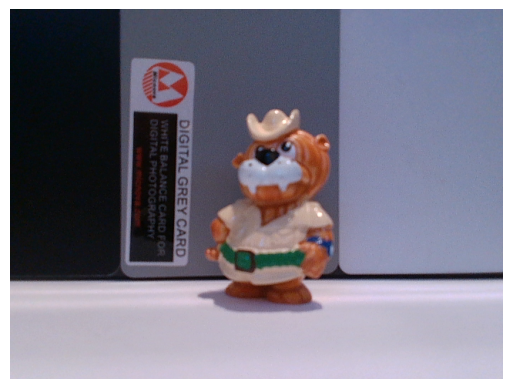

In [4]:
imageCapture = ImageCapture()
imageCapture.start()
_ = imageCapture.config_sensor()

color_image = imageCapture.get_color_frame()
logger.info('Image size: %s x %s x %s' %color_image.shape)

plt.imshow(color_image)
plt.axis('off')
plt.show()

imageCapture.stop()